<a href="https://colab.research.google.com/github/AceroMike/Deep-Learning/blob/main/Deep_Learning_Gradient_Descent_and_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Data
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

Now that we have gone over examples of implementing ANN models by changing the number of neurons and layers, activation function, and loss functions, we are ready to understand how to optimize these models. That is where **Gradient Descent** and **Backpropagation** come into play. As a recap, the **activation function** is what introduces non linearities into our model and the **Loss function** is the function that allows us to measure how well our model is working. 

We won't discuss deeply what Gradient Descent is but essentially gradient descent is an **iterative algorithm** that seeks to find the best values for our weights. With each iteration it will update the weights. How the gradient descent algorithm performs, depends on the **learning rate**. 

How much we want the algorithm to learn and adjust the weights at iteration. Setting a good value for the learning rate is important. Too high or low of a value and we may not converge to the minimum or will take too long to converge. The learning rate has to be just right. if you set the learning rate to a good value, two things should happen:

- The training should converge—that is, it should reach a value so close to the local or global minimum that there is usually no significant error decrease or performance increase anymore.
- The convergence speed should be reasonable.

**Backpropagation**

Backpropagation is the process in which gradient descent is applied to adjust the rates. If you have taken calculus then these concepts may be easier to understand. The **objective function** is what we try and optimize via **Gradient Descent**. If you recall from calculus, our objective function can have any amount of variables. We essentially want to take the derivative of this function. Backpropagation tells us to start at the output and work backwards using the chainrule.

**Mini Batch Stochastic Gradient Descent**

In practice, applying gradient descent would take too long because we have to apply gradient descent on all the data. Mini Batch Stochastin Gradient Descent is a variant of Gradient descent. In each iteration, the gradient descent algorithm uses the entire training dataset to compute the gradient. Because of this, it's sometimes referred to as **batch gradient descent**. **Stochastic gradient descent randomly selects only one example in each iteration to compute the gradient**. You can perform random uniform sampling for each iteration to form a mini-batch, and then you can use this mini-batch to compute the gradient.
When we have set the batch size, we have used this variant of gradient descent. So nothing new.


In this notebook we will again use the MNIST dataset to model ANNs while changing the learning rate. We will also see how our model changes when we change the batch size. That is, the amount of data used to optimize via stochastic gradient descent. 

Now to load and preprocess the data as we have done in the previous notebooks.


In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)


Now let's build some models. As before, I want to take an approach where I only change one thing in the model, that is, `ceteris paribus`. First, I will start by changing the batchsize of the model. I will create 3 models with the following specifications:
Three-layer ANN model with 128, 64, and 10 neurons in the layers and compare different batchsizes of 8, 128, and full sample. We will use the **ReLU** activation function and **categorical cross-entropy** loss function since they performed best in the previous notebook. Now let's define a funciton that will build our models.

In [3]:
def build_model(activation='relu', loss='categorical_crossentropy', optimizer='sgd'):
  model = Sequential()
  model.add(Dense(128, input_shape=(784,), activation=activation))
  model.add(Dense(64, input_shape=(784,), activation=activation))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

  return model

For this, we will only be building one model, but when we fit the model, we will applying different batch sizes. 

In [4]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Now Let's try different batch sizes starting with 8
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=8, epochs=20, verbose=1)

Epoch 1/20
7500/7500 [==============================] - 14s 2ms/step - loss: 0.6224 - accuracy: 0.8213 - val_loss: 0.1958 - val_accuracy: 0.9430
Epoch 2/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.1931 - accuracy: 0.9425 - val_loss: 0.1429 - val_accuracy: 0.9559
Epoch 3/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1336 - accuracy: 0.9604 - val_loss: 0.1177 - val_accuracy: 0.9642
Epoch 4/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.1018 - accuracy: 0.9705 - val_loss: 0.1024 - val_accuracy: 0.9693
Epoch 5/20
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.0966 - val_accuracy: 0.9692
Epoch 6/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0729 - accuracy: 0.9789 - val_loss: 0.0910 - val_accuracy: 0.9718
Epoch 7/20
7500/7500 [==============================] - 13s 2ms/step - loss: 0.0603 - accuracy: 0.9827 - val_loss: 0.0803 - val_ac

In [6]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08166755735874176
Test accuracy: 0.9768000245094299


In [8]:
model = build_model()
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.7362 - accuracy: 0.4816 - val_loss: 0.5810 - val_accuracy: 0.8580
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5290 - accuracy: 0.8687 - val_loss: 0.3978 - val_accuracy: 0.8905
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8935 - val_loss: 0.3418 - val_accuracy: 0.9048
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3498 - accuracy: 0.9025 - val_loss: 0.3114 - val_accuracy: 0.9107
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.9072 - val_loss: 0.2913 - val_accuracy: 0.9160
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3007 - accuracy: 0.9148 - val_loss: 0.2755 - val_accuracy: 0.9205
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.9188 - val_loss: 0.2662 - val_accuracy: 0.9227
Epoch 

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.17272615432739258
Test accuracy: 0.9491000175476074


In [10]:
model = build_model()
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=X_train.shape[0], epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 2.3405 - accuracy: 0.0994 - val_loss: 2.3293 - val_accuracy: 0.1047
Epoch 2/20
1/1 [==============================] - 0s 378ms/step - loss: 2.3341 - accuracy: 0.1004 - val_loss: 2.3229 - val_accuracy: 0.1061
Epoch 3/20
1/1 [==============================] - 0s 346ms/step - loss: 2.3279 - accuracy: 0.1016 - val_loss: 2.3166 - val_accuracy: 0.1077
Epoch 4/20
1/1 [==============================] - 0s 343ms/step - loss: 2.3217 - accuracy: 0.1030 - val_loss: 2.3104 - val_accuracy: 0.1095
Epoch 5/20
1/1 [==============================] - 0s 361ms/step - loss: 2.3156 - accuracy: 0.1046 - val_loss: 2.3042 - val_accuracy: 0.1104
Epoch 6/20
1/1 [==============================] - 0s 346ms/step - loss: 2.3096 - accuracy: 0.1067 - val_loss: 2.2982 - val_accuracy: 0.1126
Epoch 7/20
1/1 [==============================] - 0s 342ms/step - loss: 2.3037 - accuracy: 0.1089 - val_loss: 2.2922 - val_accuracy: 0.1148
Epoch 8/20
1/1 [=======

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.218942880630493
Test accuracy: 0.17640000581741333


**Which model performed best?**

So you may have noticed that the higher the batch size the less time the model took to compile. There reason for this is that the model is choosing how many samples to iterate through **AT A TIME**. We never expected the model that used the full sample to work well. However we do see that the lower the batch size the longer the computation time and the more likely we are to overfit. So, to avoid overfitting, and to save on computation time, we will stick with the model of batch size 128. 

**Changing the learning rate**

Now we want to change a different parameter that will affect how quickly, or if we converge, the *learning rate*. Using the best model from the previous example, we will now change the optimizer. We will keep using **Stochastic Gradient Descent** but will now customize the learning rate. Previously, we used the default learning rate. Now we will look at 3 additional models, defined the same way, but with different learning rates of 0.0000001, 0.01, and 100. We will compare the results of the model. 

In [22]:
# We will redefine sgd for each model
def build_model(activation='relu', loss='categorical_crossentropy', optimizer='sgd'):
  model = Sequential()
  model.add(Dense(128, input_shape=(784,), activation=activation))
  model.add(Dense(64, input_shape=(784,), activation=activation))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

  return model

# Function for Visualizations
def viz_history(history):
  df = pd.DataFrame(history.history)
  df[['loss', 'val_loss']].plot(figsize=(20,10))
  df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))

**Learning rate (0.0000001):**

In [24]:
sgd = SGD(lr=0.0000001)
model = build_model(optimizer=sgd)

# We are defining a variable history
# This will allow for visualizations of results
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 2.3856 - accuracy: 0.0782 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3852 - accuracy: 0.0781 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3831 - accuracy: 0.0760 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3827 - accuracy: 0.0765 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3833 - accuracy: 0.0785 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3818 - accuracy: 0.0764 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 2.3834 - accuracy: 0.0778 - val_loss: 2.3818 - val_accuracy: 0.0767
Epoch 

When we use a very small learning rate, our model will learn very little at each iteration. The accuracy barely improves. 

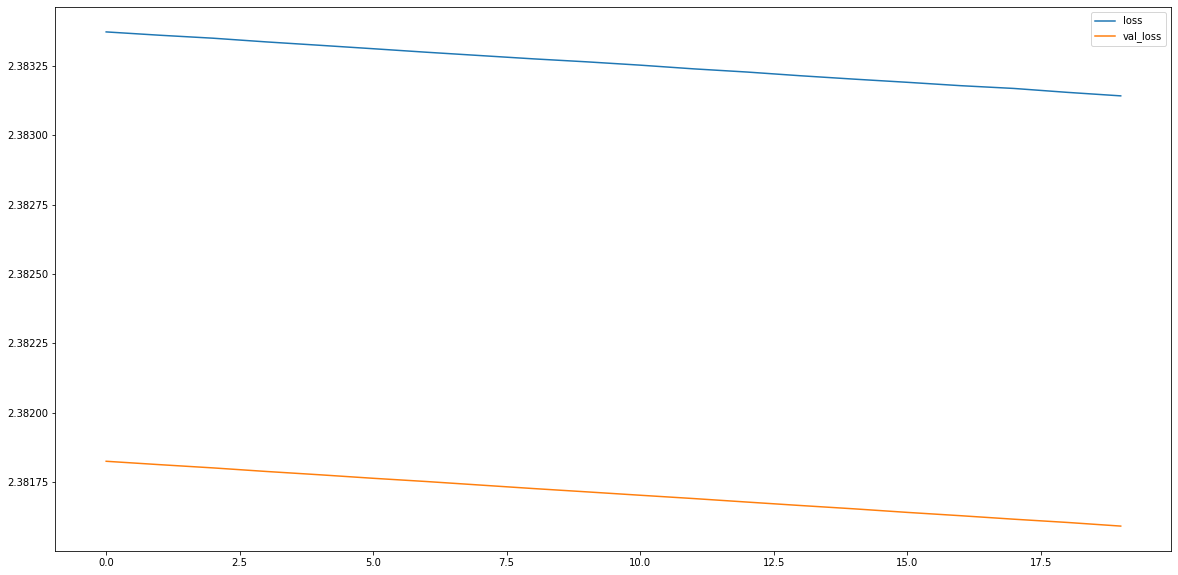

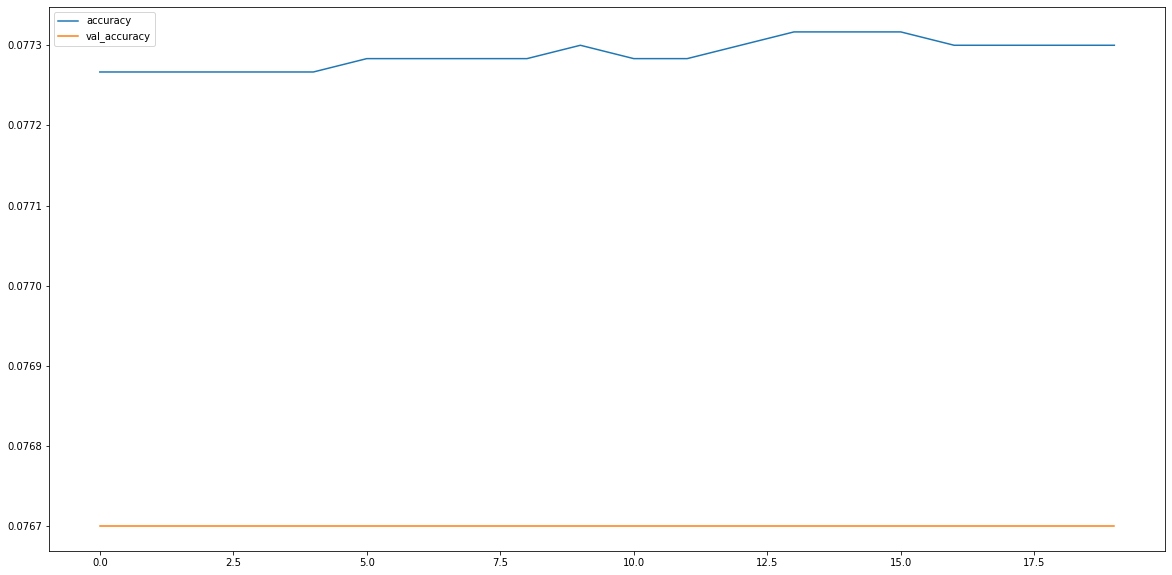

In [25]:
viz_history(history)

**Learning Rate (0.01):**

We expect this model to do better at learning. 

In [27]:
# Defining learning rate
sgd = SGD(lr=0.01)

# Model
model = build_model(optimizer=sgd)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.7281 - accuracy: 0.4916 - val_loss: 0.6031 - val_accuracy: 0.8596
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5407 - accuracy: 0.8677 - val_loss: 0.3989 - val_accuracy: 0.8927
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3935 - accuracy: 0.8920 - val_loss: 0.3401 - val_accuracy: 0.9054
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.9040 - val_loss: 0.3082 - val_accuracy: 0.9131
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.9121 - val_loss: 0.2866 - val_accuracy: 0.9194
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.9176 - val_loss: 0.2699 - val_accuracy: 0.9242
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2752 - accuracy: 0.9225 - val_loss: 0.2567 - val_accuracy: 0.9272
Epoch 

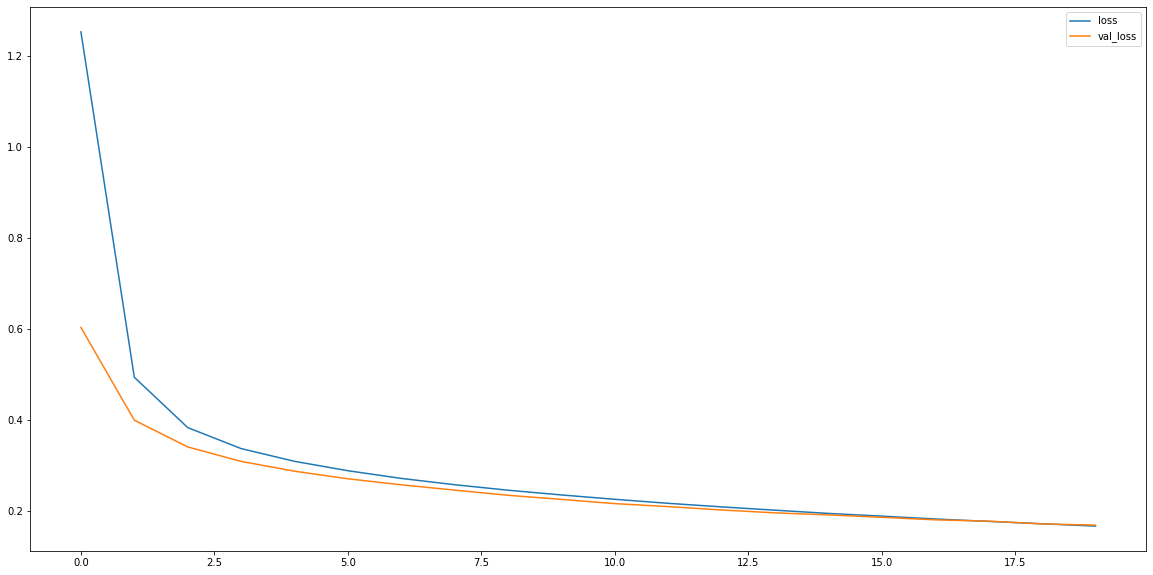

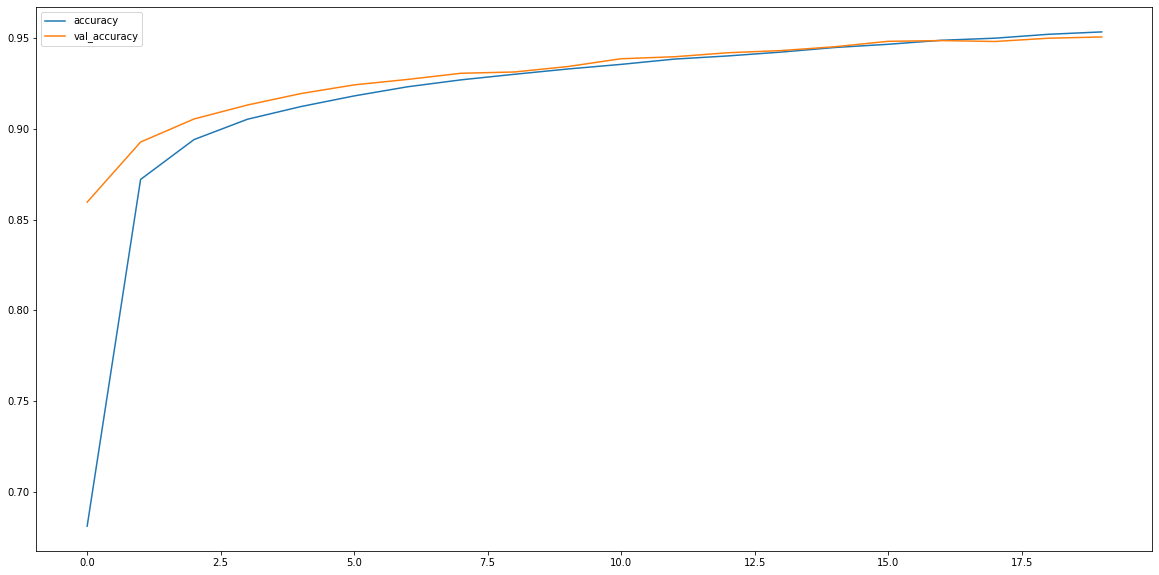

In [28]:
#Visualizations
viz_history(history)

In [29]:
# Scores
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.16792581975460052
Test accuracy: 0.9506000280380249


Once we change the learning rate our model seems to converge and has an accuracy of 95%. We will generally want to find an accuracy that is not too small, or as we will see, not too large. 

**Learning Rate (100):**

In [31]:
# Defining learning rate
sgd = SGD(lr=100)

# Model
model = build_model(optimizer=sgd)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 38551627220338112.0000 - accuracy: 0.1009 - val_loss: 35.0065 - val_accuracy: 0.1028
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 40.0623 - accuracy: 0.1006 - val_loss: 29.3183 - val_accuracy: 0.0980
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 40.3948 - accuracy: 0.1010 - val_loss: 45.1204 - val_accuracy: 0.0892
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 41.6012 - accuracy: 0.0981 - val_loss: 43.8028 - val_accuracy: 0.1028
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 39.5115 - accuracy: 0.1014 - val_loss: 39.1116 - val_accuracy: 0.0974
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 40.0729 - accuracy: 0.0980 - val_loss: 36.3052 - val_accuracy: 0.1135
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 40.4881 - accuracy: 0.1008 - val_loss: 36.8548 

A learning rate too fast and it does not actually learn. We see the accuracy and loss bouncing around.  

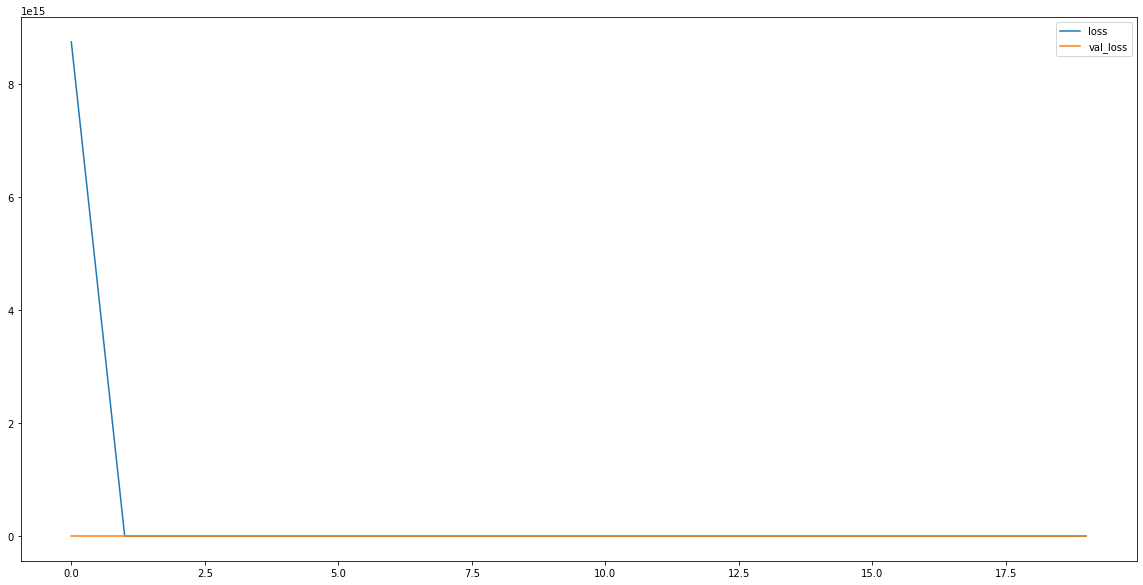

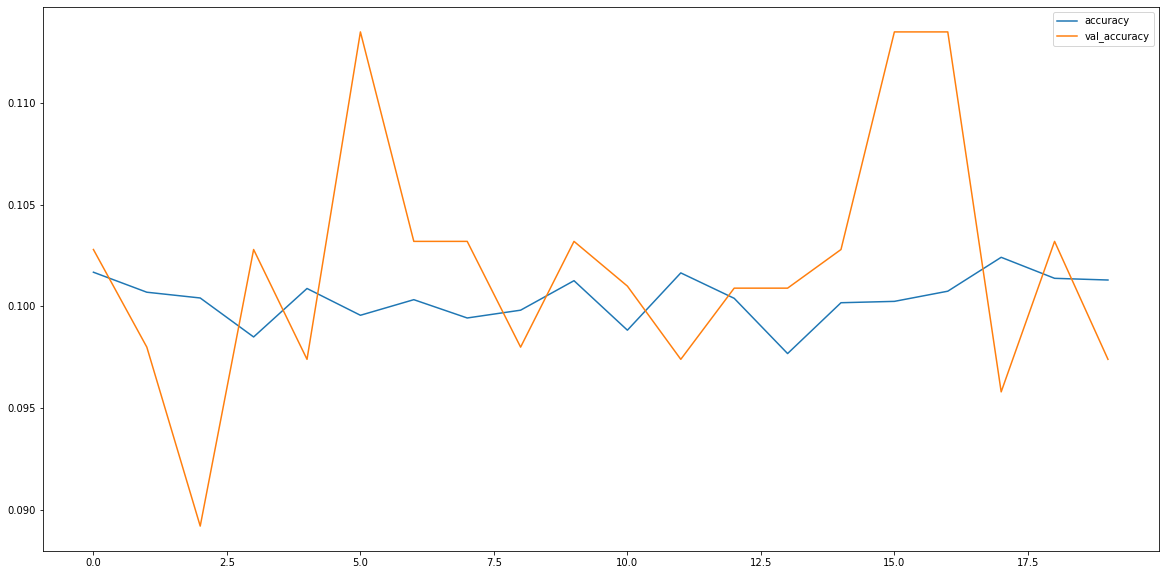

In [32]:
#Visualizations
viz_history(history)

In [33]:
# Scores
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 46.33363723754883
Test accuracy: 0.09740000218153


Finding an appropriate value for the learning rate is important in a model. We will want to hypertune the parameter when devoloping our models. 